In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
train_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_x_100_5.npy")
train_data_y = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_y.npy")
test_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\test_x_100_5.npy")

In [3]:
train_data_x.shape

(25000, 100)

In [4]:
train_data_x = train_data_x.reshape(25000,100,1)

###  using Keras LSTM

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [6]:
model = Sequential()

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(100,1)))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data_x, train_data_y,
          epochs=100, shuffle= True,
          batch_size=32, validation_split=0.2,
          callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

model.evaluate(train_data_x, train_data_y, batch_size=32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 88s 4ms/step - loss: 0.6336 - acc: 0.6347 - val_loss: 0.6093 - val_acc: 0.6702
Epoch 2/100
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5863 - acc: 0.6778 - val_loss: 0.5595 - val_acc: 0.7136
Epoch 3/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.5362 - acc: 0.7188 - val_loss: 0.5132 - val_acc: 0.7512
Epoch 4/100
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5146 - acc: 0.7411 - val_loss: 0.4835 - val_acc: 0.7672
Epoch 5/100
20000/20000 [==============================] - 87s 4ms/step - loss: 0.5037 - acc: 0.7535 - val_loss: 0.4758 - val_acc: 0.7780
Epoch 6/100
20000/20000 [==============================] - 85s 4ms/step - loss: 0.4871 - acc: 0.7640 - val_loss: 0.4949 - val_acc: 0.7666
Epoch 7/100
20000/20000 [==============================] - 85s 4ms/step - loss: 0.4783 - acc: 0.7710 - val_loss: 0.4683 - v

[0.4158741228199005, 0.81084]

### draw ROC curve

In [7]:
from sklearn.metrics import roc_curve
y_pred = model.predict(train_data_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_data_y, y_pred)

In [8]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

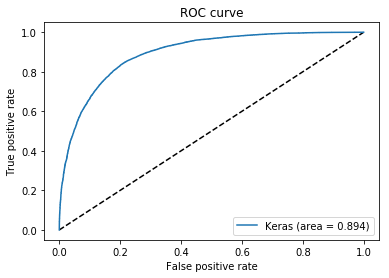

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### predict test data

In [12]:
test_data_y = model.predict(test_data_x.reshape(25000,100,1))

### sava result

In [13]:
# test_id = pd.read_csv('E:\\school\\2-2\\AI\\Project2\\data\\testData.tsv', sep="\t", header=0)

In [14]:
# test_y_path = 'E:\\school\\2-2\\AI\\Project2\\data\\w2vLSTM.csv'

In [15]:
# test_id['sentiment'] = test_data_y

In [16]:
# test_id.to_csv(test_y_path, columns=['id', 'sentiment'], index=0)